In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# import xgboost as xgb
# import matplotlib.pyplot as plt
# import seaborn as sns
 
# # Load the dataset
# df = pd.read_csv('Ranked_data.csv')

# # Prepare the features and target
# X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank'], axis=1)
# y = df['Overall_score']


# # Encode categorical variables
# le = LabelEncoder()
# X['Player_type'] = le.fit_transform(X['Player_type'])

# # Scale numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 4, 5, 6, 7, 8],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'min_child_weight': [1, 2, 3, 4, 5]
# }

# # Initialize the XGBoost model
# xgb_model = xgb.XGBRegressor(random_state=42)

# # Perform RandomizedSearchCV
# xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
#                                 n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
# xgb_random.fit(X_train, y_train)

# # Get the best model
# best_xgb_model = xgb_random.best_estimator_

# # Make predictions
# y_pred = best_xgb_model.predict(X_test)

# # Calculate metrics
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared Score: {r2}")
# print(f"Accuracy: {r2 * 100:.2f}%")
# Mean Squared Error: 3.2368407639578782
# R-squared Score: 0.9929700047376909
# Accuracy: 99.30%

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('Ranked_data.csv')

In [4]:
df.columns.tolist()

['Unnamed: 0',
 'striker',
 'totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean',
 'totalrunsscored_norm',
 'Total_batting_average_norm',
 'batting_strike_rate_norm',
 'totalwickets_norm',
 'economyrate_norm',
 'Player_type',
 'Overall_score',
 'Rank']

In [5]:
# Prepare the features and target
X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank','totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean'], axis=1)
y = df['Overall_score']

In [6]:

# Encode categorical variables
le = LabelEncoder()
X['Player_type'] = le.fit_transform(X['Player_type'])

In [7]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

This splits the data into training (80%) and testing (20%) sets.

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


This defines the hyperparameter space to search. Each parameter affects the model differently:
n_estimators: number of boosting rounds
max_depth: maximum depth of trees
learning_rate: step size shrinkage used to prevent overfitting
subsample: fraction of samples used for fitting the individual trees
colsample_bytree: fraction of features used for building each tree
min_child_weight: minimum sum of instance weight needed in a child
Model Initialization and Hyperparameter Tuning:

In [9]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5]
}

In [10]:
# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_random.fit(X_train, y_train)

This initializes the XGBoost model and uses RandomizedSearchCV to perform hyperparameter tuning. It will try 100 random combinations of hyperparameters, using 5-fold cross-validation for each.
Best Model Selection and Prediction:

In [11]:
# Perform RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
                                n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [12]:
# Get the best model
best_xgb_model = xgb_random.best_estimator_

# Make predictions
y_pred = best_xgb_model.predict(X_test)

In [13]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Accuracy: {r2 * 100:.2f}%")

Mean Squared Error: 2.488091339657733
R-squared Score: 0.9945961906669148
Accuracy: 99.46%


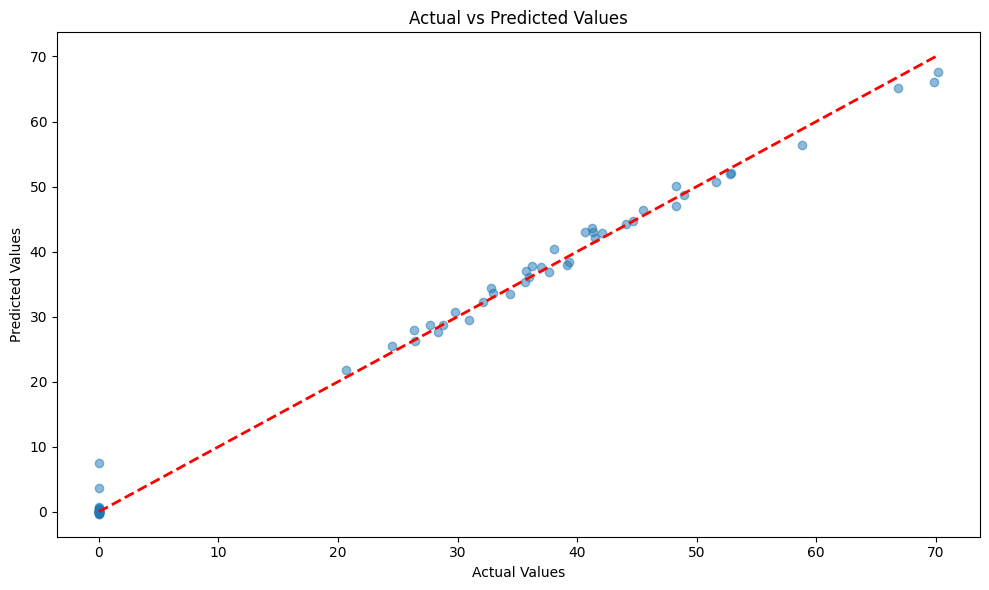

In [14]:

# 1. Actual vs Predicted values scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

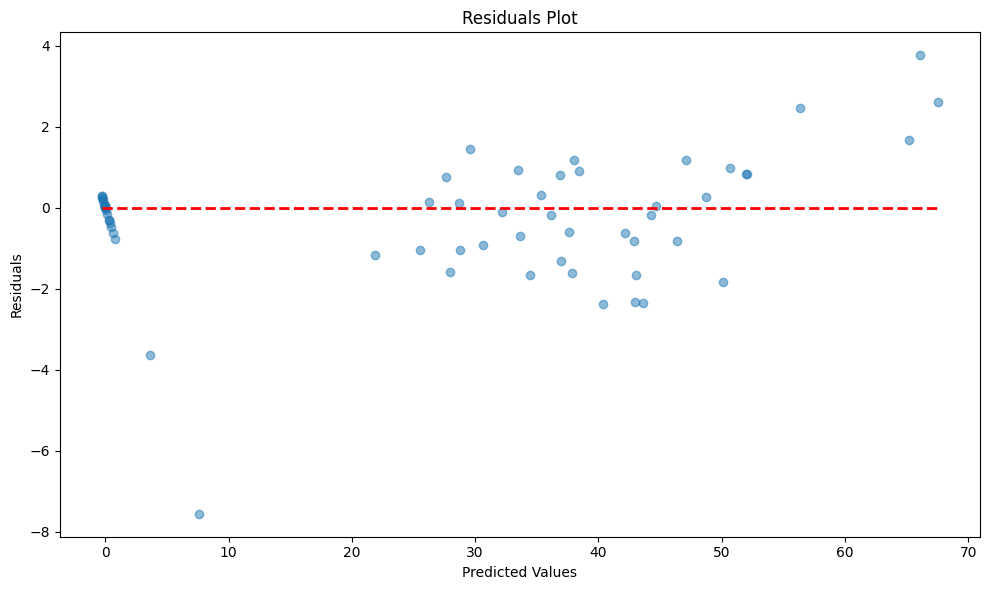

In [15]:
# 2. Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'r--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()

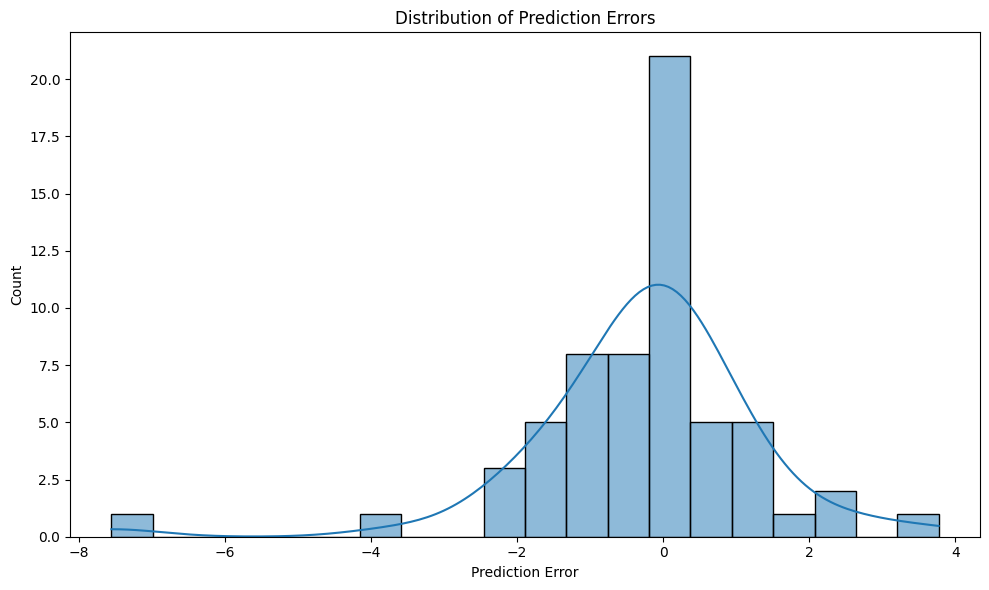

In [16]:
# 4. Prediction error distribution histogram
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()

This Gradient Boosting Regression approach uses XGBoost, which is known for its speed and performance. The hyperparameter tuning process helps to find the optimal model configuration for your specific dataset, potentially leading to better predictions compared to using default parameters.

In [17]:
# example_data = pd.read_csv("Ranked_data_with_wk.csv")
# example_data.columns.to_list()

In [18]:
# Example data for prediction
example_data = pd.DataFrame({
    'totalrunsscored_norm': [0.22, 0.53, 0.02],
    'Total_batting_average_norm': [0.32, 0.58, 0.13],
    'batting_strike_rate_norm': [0.40, 0.49, 0.30],
    'totalwickets_norm': [0.06, 0.02, 0.54],
    'economyrate_norm': [0.68, 0.75, 0.82],
    'Player_type': ['Batsman', 'Batsman', 'Bowler']
})

# Encode 'Player_type'
example_data['Player_type'] = le.transform(example_data['Player_type'])

# Scale the features
example_data_scaled = scaler.transform(example_data)
example_data_scaled = pd.DataFrame(example_data_scaled, columns=example_data.columns)

# Make predictions
predicted_scores = best_xgb_model.predict(example_data_scaled)

# Add predictions to the example data
example_data['Predicted_Overall_score'] = predicted_scores

# Display results
print(example_data[['Player_type', 'Predicted_Overall_score']])

   Player_type  Predicted_Overall_score
0            1                28.812056
1            1                54.016953
2            2                57.723633


In [22]:
data = pd.read_csv("Ranked_data.csv")

In [31]:
data.columns.to_list()

['Unnamed: 0',
 'striker',
 'totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean',
 'totalrunsscored_norm',
 'Total_batting_average_norm',
 'batting_strike_rate_norm',
 'totalwickets_norm',
 'economyrate_norm',
 'Player_type',
 'Overall_score',
 'Rank']

In [34]:
# Transform your dataset for prediction
example_data = pd.DataFrame({
    'totalrunsscored_norm': data['totalrunsscored_norm'],
    'Total_batting_average_norm': data['Total_batting_average_norm'],
    'batting_strike_rate_norm': data['batting_strike_rate_norm'],
    'totalwickets_norm': data['totalwickets_norm'],
    'economyrate_norm': data['economyrate_norm'],
   'Player_type': data['Player_type'] 
})

# Encode 'Player_type'
example_data['Player_type'] = le.transform(example_data['Player_type'])

# Scale the features
example_data_scaled = scaler.transform(example_data)
example_data_scaled = pd.DataFrame(example_data_scaled, columns=example_data.columns)

# Make predictions
predicted_scores = best_xgb_model.predict(example_data_scaled)

# Add predictions to the example data
example_data['Predicted_Overall_score'] = predicted_scores

# Add player names to the example data
example_data['Player'] = data['striker']

# Display results
print(example_data[['Player','Predicted_Overall_score']])

             Player  Predicted_Overall_score
0         YS Chahal                86.796410
1          CV Varun                74.100044
2    Mohammed Shami                72.765877
3        Avesh Khan                72.094269
4      F du Plessis                70.573029
..              ...                      ...
297     Virat Singh                -0.012668
298    Vishnu Vinod                 0.097878
299  Vivrant Sharma                 7.555071
300        YV Dhull                -0.008736
301   Yudhvir Singh                 0.006837

[302 rows x 2 columns]


In [35]:
example_data.to_csv("xgboost_model_1_prediction.csv")